
<center> <img src="../../img/ods_stickers.jpg"> </center>

## <center> Individual Project </center> ##
## <center> "Predicting a Pulsar Star" </center> ##
### <center> Аuthor: Aleksei Demin </center> ###

## Part 1: Feature and data explanation




<center>
<img src= "../../img/pulsar.PNG">
</center>


### Introduction

   A pulsar is a highly magnetized rotating neutron star that emits a beam of electromagnetic radiation. This radiation can be observed only when the beam of emission is pointing toward Earth (much like the way a lighthouse can be seen only when the light is pointed in the direction of an observer), and is responsible for the pulsed appearance of emission. Neutron stars are very dense, and have short, regular rotational periods. This produces a very precise interval between pulses that ranges from milliseconds to seconds for an individual pulsar. Pulsars are believed to be one of the candidates for the source of ultra-high-energy cosmic rays (see also centrifugal mechanism of acceleration).


Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation . Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

### Dataset information

[Kaggle link](https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star)


Provided dataset contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

### Data explanation

Each object described by 8 continuous variables, and a single class target variable. 

The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the DM-SNR curve.

|               № | Description |
|-----------------|----------------------------------------|
|               1 | Mean of the integrated profile |
|     2 | Standard deviation of the integrated profile |
|   3| Excess kurtosis of the integrated profile |
|       4 | Skewness of the integrated profile |
|                   5 | Mean of the DM-SNR curve |
|                      6 | Standard deviation of the DM-SNR curve |
|            7 | Excess kurtosis of the DM-SNR curve |
|              8 | Skewness of the DM-SNR curve |
|  **target_class** | **Target variable** - Object is a pulsar or not |


#### Small clarification about skewness and kurtosis
   Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is referred to as skewed. Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center).
   
#### Small clarification about DM-SNR

<center>
<img src="../../img/dmsnr.PNG">
    Example of DM-SNR curve
</center>

   One of parameter a space that be described is the Dispersion Measure (DM) of space. Dispersion is caused by the interstellar medium, and is different for every pulsar, depending on its distance and the number of electrons in the interstellar medium in the direction of the pulsar. Dispersion causes the lower frequencies of the signal to arrive later than the higher frequencies. This smears out, or disperses, the pulse. This smearing will completely obliterate the pulse if the signal is not dedispersed before folding.


SNR - Pulse profile signal-to-noise ratio. 

## Part 2: Primary data analysis

#### Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, validation_curve
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb

warnings.filterwarnings("ignore")
%matplotlib inline

#### Read the data

In [2]:
data = pd.read_csv('pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### Data information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [4]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


#### Correlation between fields

In [5]:
data.corr()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
Mean of the integrated profile,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Standard deviation of the integrated profile,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Excess kurtosis of the integrated profile,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Skewness of the integrated profile,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
Mean of the DM-SNR curve,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
Standard deviation of the DM-SNR curve,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
Excess kurtosis of the DM-SNR curve,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
Skewness of the DM-SNR curve,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
target_class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


#### Missing values

In [6]:
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

#### Target class

In [7]:
data['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

#### Some conclusions after primary data analysis

- we can observe quite large maximum values for all features, probably outliers
- kurtosis and skewness does not correlate with the mean value and standard deviation, which corresponds to the theory
- data types are all numeric and non-null, there's no need to do any transformations or cleaning

## Part 3: Primary visual data analysis

#### Preprocessing

In [8]:
df = pd.DataFrame()

columns_old = [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile',
           ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve',
           ' Skewness of the DM-SNR curve', 'target_class']
columns_new = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target_class']

for i in range(len(columns_old)):
    df[columns_new[i]] = data[columns_old[i]]

df.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


#### First of all let's look at our target proportions

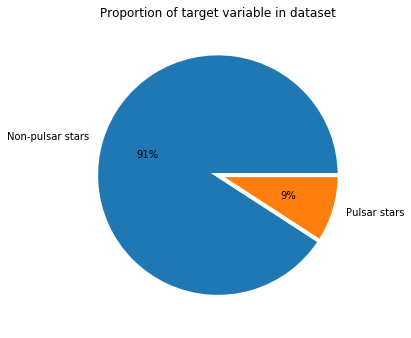

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(122)
plt.pie(data["target_class"].value_counts().values,
        labels=["Non-pulsar stars","Pulsar stars"],
        autopct="%1.0f%%",wedgeprops={"linewidth":4,"edgecolor":"white"})
plt.subplots_adjust(wspace = .2)
plt.title("Proportion of target variable in dataset")
plt.show()

#### Distribution of feature variables

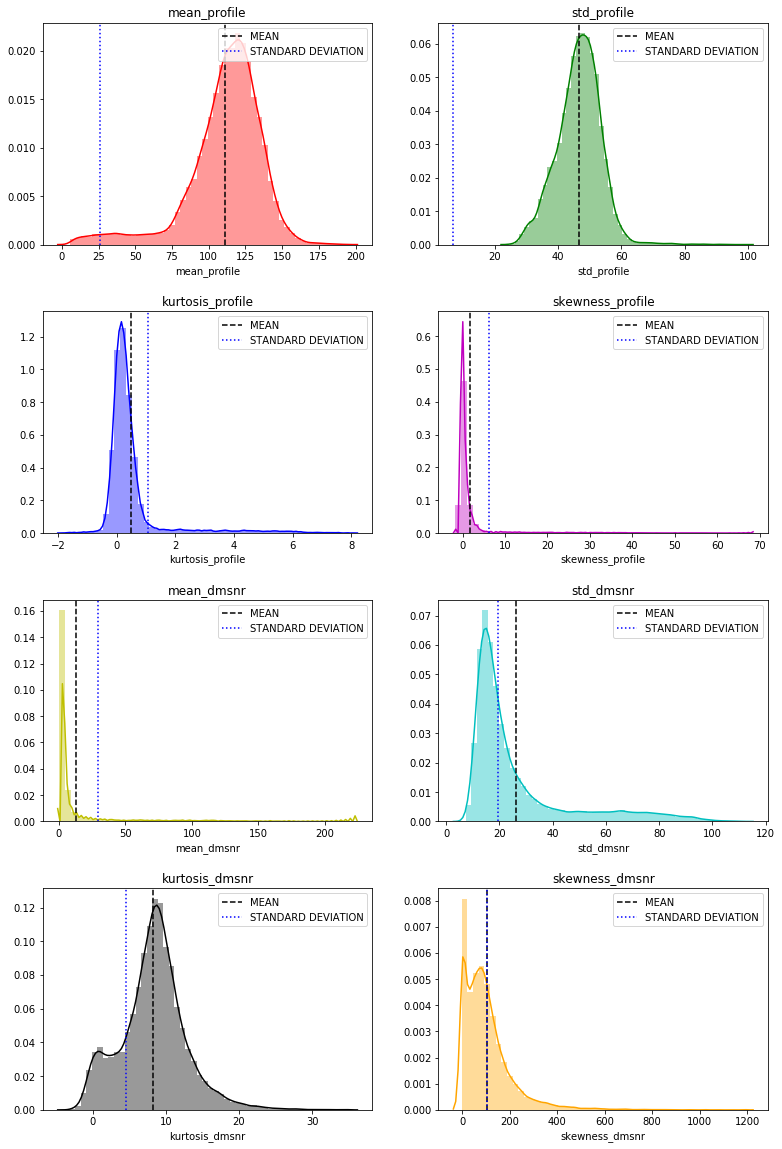

In [10]:
columns_new = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']
length  = len(columns_new)
colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(13,20))
for i,j,k in itertools.zip_longest(columns_new,range(length),colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(df[i],color=k)
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(df[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

#### Comparing mean and std beetwen features for target class

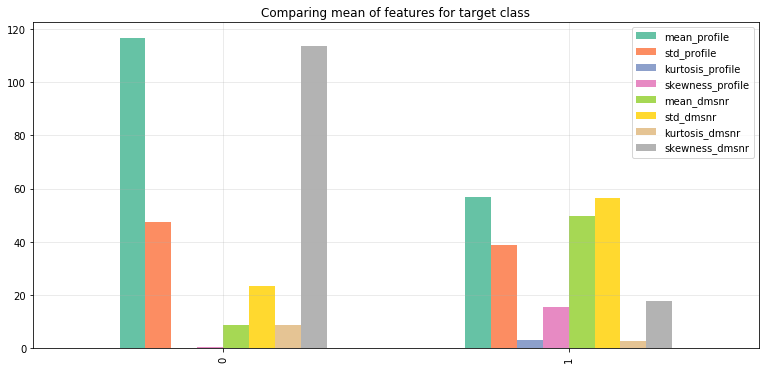

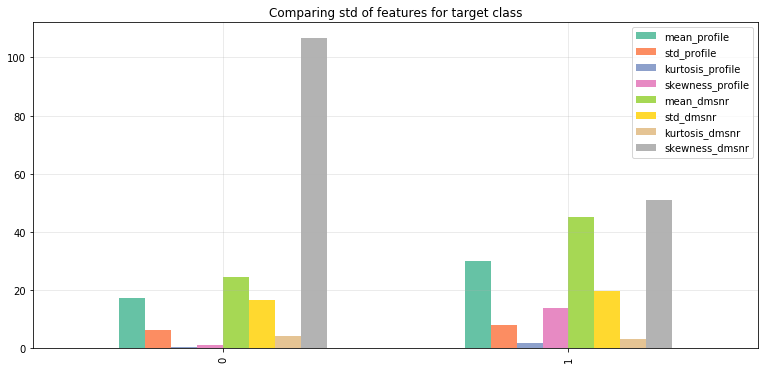

In [11]:
compare = df.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']].mean().reset_index()
compare = compare.drop("target_class",axis =1)

compare.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("Comparing mean of features for target class")

compare1 = df.groupby("target_class")[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']].std().reset_index()
compare1 = compare1.drop("target_class",axis=1)
compare1.plot(kind="bar",width=.6,figsize=(13,6),colormap="Set2")
plt.grid(True,alpha=.3)
plt.title("Comparing std of features for target class")
plt.show()

#### PairPlot of all features

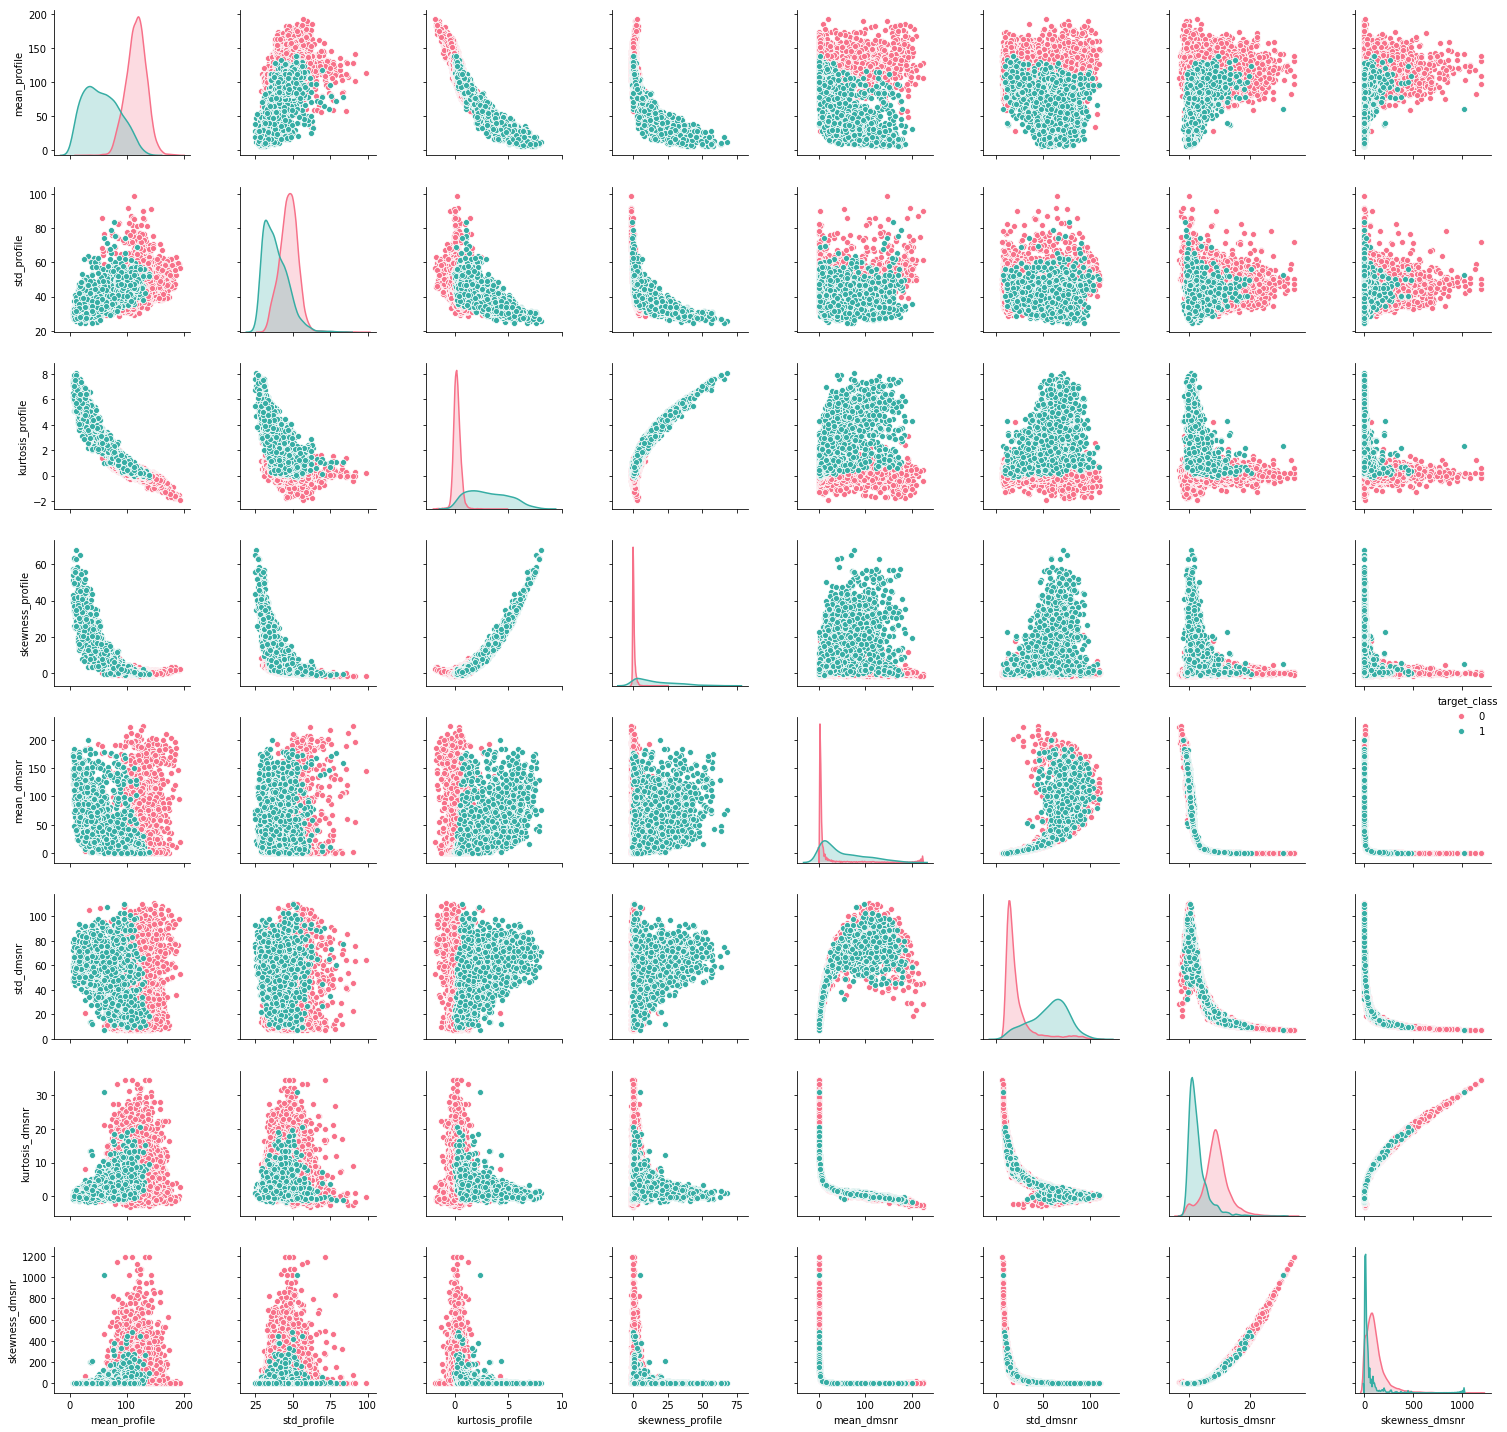

In [12]:
sns.pairplot(data=df,
             palette="husl",
             hue="target_class",
             vars=['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
           'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr'])

plt.tight_layout()
plt.show()  

#### Correlation HeatMap

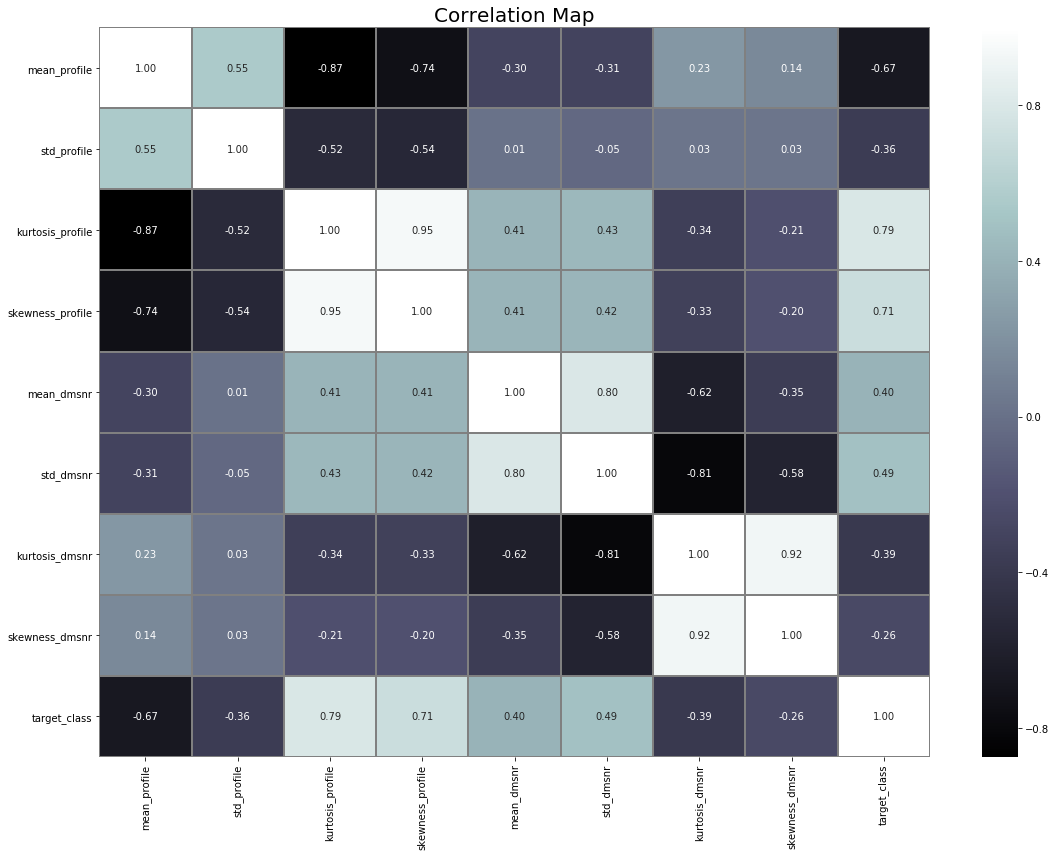

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
plt.title("Correlation Map",fontsize=20)
plt.tight_layout()
plt.show() 

#### Some conclusions after visual data analysis

- high mean values of 'Mean of integrated profile' and 'Skewness of the DM-SNR curve' are relate to Non-pulsar objects
- high mean value of 'Mean of the DM-SNR curve' is relate to Pulsar objects
- high std value of 'Skewness of the DM-SNR curve' is relate to Non-pulsar objects
- plots of distribution of kurtosis and skewness of integrated profile and parameters of DM-SNR curve have a long tails. Also we can observe it in table of second part of project (large maximum values in data discription table)
- like in a part 2 of this project, on HeatMap we see that kurtosis and skewness does not correlate with the mean value and standard deviation, which corresponds to the theory

## Part 4: Insights and found dependencies

#### Let's take a closer look at couple of pair plots

Text(0.5, 1.0, 'Scatter plot for skewness and kurtosis for target classes')

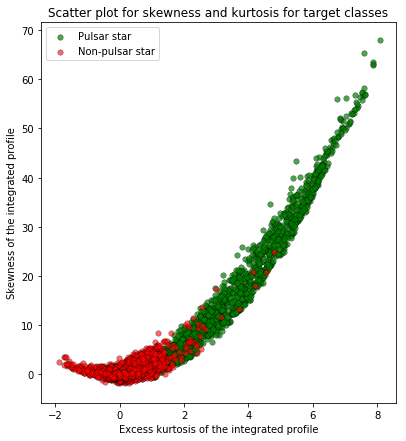

In [14]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=df[df["target_class"] == 1],alpha=.7,
            label="Pulsar star",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "kurtosis_profile",y = "skewness_profile",
            data=df[df["target_class"] == 0],alpha=.6,
            label="Non-pulsar star",s=30,color ="r",linewidths=.4,edgecolors="black")

plt.legend(loc ="best")
plt.xlabel("Excess kurtosis of the integrated profile")
plt.ylabel("Skewness of the integrated profile")
plt.title("Scatter plot for skewness and kurtosis for target classes")

Text(0.5, 1.0, 'Scatter plot for skewness and kurtosis for target classes')

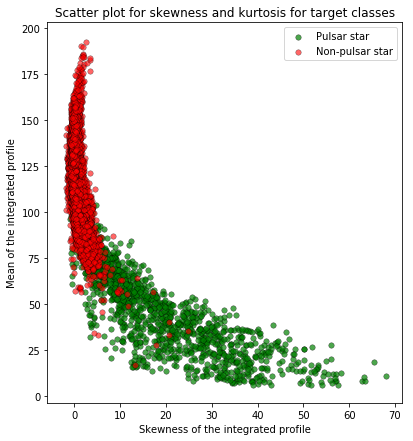

In [15]:
plt.figure(figsize=(14,7))

plt.subplot(121)
plt.scatter(x = "skewness_profile",y = "mean_profile",
            data=df[df["target_class"] == 1],alpha=.7,
            label="Pulsar star",s=30,color = "g",linewidths=.4,edgecolors="black")
plt.scatter(x = "skewness_profile",y = "mean_profile",
            data=df[df["target_class"] == 0],alpha=.6,
            label="Non-pulsar star",s=30,color ="r",linewidths=.4,edgecolors="black")

plt.legend(loc ="best")
plt.xlabel("Skewness of the integrated profile")
plt.ylabel("Mean of the integrated profile")
plt.title("Scatter plot for skewness and kurtosis for target classes")

#### So here we see that target can be easily separate on some features. It's powerfull insight that tell us what features are important.

Thus example object with high value of skewness and kurtosis of integrated profile probably a Pulsar.

## Part 5: Metrics selection

For binary classification we have these metrics:
- Accuracy
- Precision
- Recall
- F-measure
- ROC-AUC

#### Current dataset have a significant disbalance in the target class (only 9% of objects are Pulsars). For this case i'll choose Area Under the Receiver Operating Characteristic Curve (ROC AUC) metric.


ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

Area Under Curve (AUC) is one of the most widely used metrics for evaluation. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

## Part 6: Model selection

#### These are the most commonly used models for binary classification tasks. Also this dataset have a small number of objects and attributes. In this case I make this choice:

- `RandomForestClassifier` - Composition of the decision trees. This model has good agregation abilities. Easy to configure hyperparameters to get a good result.
- `Gradient boosting on decision trees (LightGBM)` - Gradient Boosting give us the ability to get better score when configuring hyperparameters.


## Part 7: Data preprocessing

#### Splitting the Feature and Target

In [16]:
y = df.target_class.values
df.drop(["target_class"],axis=1,inplace=True)
X = df.values

#### Scaling
Scale up the data for the linear model, create a scaler object and train it on the training part. Applying the obtained transformation to both samples

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Splitting the Train and Test
We divide the data into training and test samples. In the test sampling we will take 30% of the data. Check that both train and test samples contains Pulsar objects.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=512)
print('Propotion of target class for train sample: ', sum(y_train)/X_train.shape[0])
print('Propotion of target class for test sample: ',sum(y_test)/X_test.shape[0]) 

Propotion of target class for train sample:  0.09570561941251596
Propotion of target class for test sample:  0.08193668528864059


## Part 8: Cross-validation and adjustment of model hyperparameters

#### We will divide the sample taking into account the balance of classes with 5-fold cross-validation

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=512)

#### Define parameters for Random Forest

In [30]:
param_grid_for_forest = { "n_estimators": [10, 50, 70],
                          "max_depth": [5, 10, 20],
                          "min_samples_split": [5, 10, 20],
                          "min_samples_leaf": [5, 10, 20]}

In [31]:
gs_forest = GridSearchCV(RandomForestClassifier(random_state=512), param_grid = param_grid_for_forest,
                         scoring='roc_auc', cv = skf, n_jobs=-1)
gs_forest.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=512, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=512, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 70], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 20], 'min_samples_leaf': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

#### Let's look at the best parametrs which found from GridSearchCV and best score for this parameters

In [32]:
print('Best parameters: ', gs_forest.best_params_)
print('Best score: ', gs_forest.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70}
Best score:  0.9752292659698268


#### Let's see what the model's score is on the test sample.

In [34]:
model_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                               n_estimators=70, random_state=512)
model_rf.fit(X_train, y_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1]))

ROC-AUC on validation set:  0.980939747372303


#### Define parameters for LightGBM

In [35]:
param_grid_for_lightgbm = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [40, 200, 1000],
    'num_leaves': [6, 10, 16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [512], 
    'colsample_bytree' : [0.66],
    'subsample' : [0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.4],
    }

In [36]:
gs_lightgbm = GridSearchCV(lgb.LGBMClassifier(random_state=512), param_grid_for_lightgbm, verbose=3, cv=skf, n_jobs=-1)
gs_lightgbm.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=512, shuffle=True),
       error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=512, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [40, 200, 1000], 'num_leaves': [6, 10, 16], 'boosting_type': ['gbdt'], 'objective': ['binary'], 'random_state': [512], 'colsample_bytree': [0.66], 'subsample': [0.75], 'reg_alpha': [1, 1.2], 'reg_lambda': [1, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

#### Let's look at best parametrs which found from GridSearchCV and best score for this parameters

In [37]:
print('Best parameters: ', gs_lightgbm.best_params_)
print('Best score: ', gs_lightgbm.best_score_)

Best parameters:  {'boosting_type': 'gbdt', 'colsample_bytree': 0.66, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 10, 'objective': 'binary', 'random_state': 512, 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.75}
Best score:  0.9793263090676884


#### Let's see which score the model gets on the test sample

In [40]:
model_gbm = lgb.LGBMClassifier(**gs_lightgbm.best_params_)
model_gbm.fit(X_train, y_train)
print('ROC-AUC on validation set: ', roc_auc_score(y_test, model_gbm.predict_proba(X_test)[:, 1]))

ROC-AUC on validation set:  0.9830886962935643


## Part 9: Creation of new features and description of this process

#### In this dataset I can't create new features. But I can try to drop some insignificant features and look at new scores.

In [41]:
#For GridSearch from Random Forest
feat_importance = pd.DataFrame(df.columns, columns = ['features'])
feat_importance['value'] = gs_forest.best_estimator_.feature_importances_
feat_importance.sort_values('value')

,features,value
7,skewness_dmsnr,0.025698
1,std_profile,0.034075
6,kurtosis_dmsnr,0.042014
4,mean_dmsnr,0.054512
5,std_dmsnr,0.080258
3,skewness_profile,0.173851
0,mean_profile,0.230557
2,kurtosis_profile,0.359034


In [42]:
#For GridSearch from LightGBM
feat_importance = pd.DataFrame(df.columns, columns = ['features'])
feat_importance['value'] = gs_lightgbm.best_estimator_.feature_importances_
feat_importance.sort_values('value')

,features,value
6,kurtosis_dmsnr,153
7,skewness_dmsnr,158
4,mean_dmsnr,183
3,skewness_profile,210
5,std_dmsnr,248
1,std_profile,259
0,mean_profile,281
2,kurtosis_profile,308


#### Let's try to drop kurtosis and skewness of DM-SNR curve and look how much score has changed

In [43]:
df_dropped = data.drop([' Excess kurtosis of the DM-SNR curve',' Skewness of the DM-SNR curve'], axis=1)
y_new = df_dropped.target_class.values
df_dropped.drop(["target_class"],axis=1,inplace=True)
X_new = df_dropped.values

In [45]:
X_scaled_new = scaler.fit_transform(X_new)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled_new, y_new, test_size=0.3, random_state=512)

In [46]:
model_rf_wo_2feat = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                               n_estimators=70, random_state=512)
model_rf_wo_2feat.fit(X_train1, y_train1)
print('ROC-AUC on validation set: ', roc_auc_score(y_test1, model_rf_wo_2feat.predict_proba(X_test1)[:,1]))

ROC-AUC on validation set:  0.9817379679144386


In [47]:
model_lgb_wo_2feat = lgb.LGBMClassifier(**gs_lightgbm.best_params_)
model_lgb_wo_2feat.fit(X_train1, y_train1)
print('ROC-AUC on validation set: ', roc_auc_score(y_test1, model_lgb_wo_2feat.predict_proba(X_test1)[:, 1]))

ROC-AUC on validation set:  0.9814696662364006


#### Drop of two features improved the Random Forest model but reduced score of LightGBM model. For now better score have LightGBM fitted on whole dataset (ROC-AUC 0.9830). Further in project I will use only LightGBM fitted on whole dataset.

## Part 10: Plotting training and validation curves

#### Training and validation curves will be drawn from the best model - LightGBM

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<Figure size 432x288 with 0 Axes>

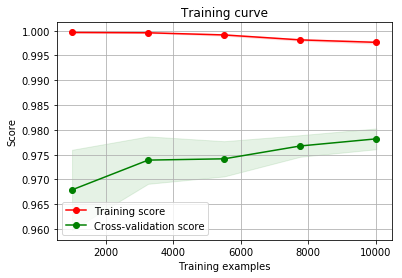

In [49]:
plt.figure(figsize=(6, 4))
plot_learning_curve(model_gbm, 'Training curve', X_train, y_train, cv=skf, n_jobs=-1);

In [50]:
a = np.arange(2, 20)
val_train, val_test = validation_curve(model_gbm, X_train, y_train, param_name='num_leaves',
                                                       param_range=a, cv=skf, scoring='roc_auc')

def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

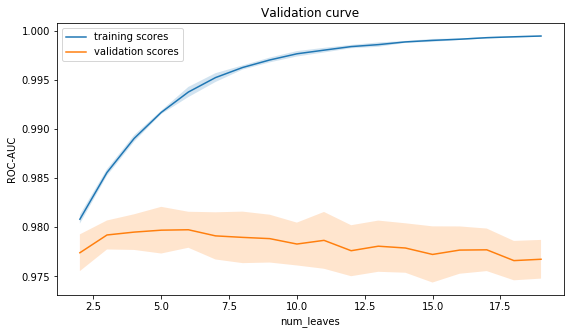

In [51]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(121)
ax1.set_title('Validation curve')
plot_with_err(a, val_train, label='training scores')
plot_with_err(a, val_test, label='validation scores')
plt.xlabel(r'num_leaves'); plt.ylabel('ROC-AUC')
plt.legend();

#### Training curve: 
The curves haven't aligned, adding new data may improve the model.
#### Validation curve:
The quality of the model is reduced as the num_leaves value increases. Hyperparameter 'num_leaves' was choosen correctly. Large value of this parameter may cause overfitting.


## Part 11: Prediction for test or hold-out samples

#### The test sample was generated from the source dataset by randomly selecting 30% of the data from the original sample with keeping the proportions of the target variable. Predictions on the test sample are presented in sections 8 and 9 of this project.
- Random Forest have a ROC-AUC on validation set (without 2 features from Part 9):  0.9817
- LightGBM have a ROC-AUC on validation set:  0.9830

## Part 12: Conclusions

#### A model with a good aggregation ability has been created. The value of this model is in the fact that it separates well space noise and Pulsars. Potentially, this model may significantly reduce search time for pulsars in space.

Further improvement of the model:
- Adding new data in dataset
- Cut large maximum values (outliers) from some features
- Better hyperparameter tuning (increasing the number of iterations, for example)
- Implementation of Neural Network